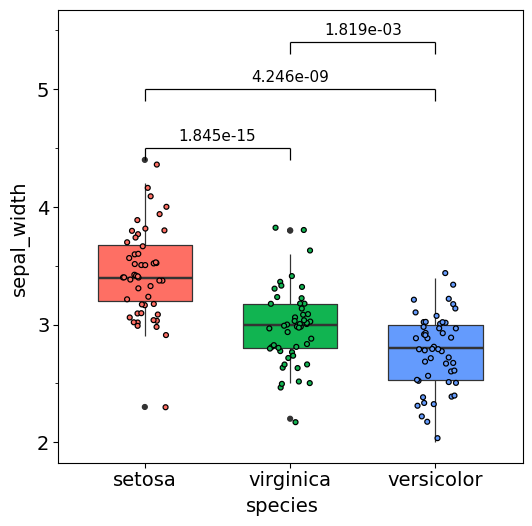

C:\Users\Hulk\AppData\Roaming\Python\Python37\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_jitter : Removed 1 rows containing missing values.


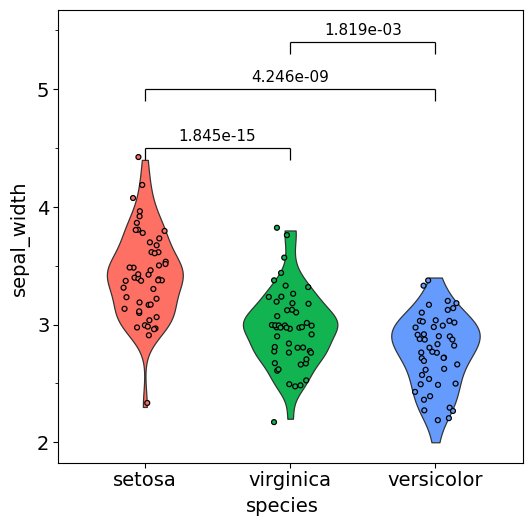

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
from scipy import stats
from pandas.api.types import CategoricalDtype

df_iris = sns.load_dataset("iris")
df_group=df_iris.groupby(df_iris['species'],as_index =False).median()
df_group=df_group.sort_values(by="sepal_width",ascending= False) 
df_iris['species']=df_iris['species'].astype(CategoricalDtype(categories=df_group['species']))

group=df_group['species']
N=len(group)
df_pvalue=pd.DataFrame(data=np.zeros((N,4)),columns=['species1','species2','pvalue','group'])
n=0
for i in range(N):
    for j in range(i+1,N):
        rvs1=df_iris.loc[df_iris['species'].eq(group[i]),'sepal_width'] 
        rvs2=df_iris.loc[df_iris['species'].eq(group[j]),'sepal_width']
        #t,p=stats.wilcoxon(rvs1,rvs2,zero_method='wilcox', correction=False)  # wilcox.test()
        t,p=stats.ttest_ind(rvs1,rvs2)   # t.test()
        df_pvalue.loc[n,:]=[i,j,format(p,'.3e'),n]
        n=n+1
df_pvalue['y']=[4.5,5.,5.4]


#--------------------------------------(b)带显著性标注的箱型图------------------------------------------------
base_plot=(ggplot() +
    geom_boxplot(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.65) +

    #geom_violin(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.65)+
    geom_jitter(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.15)+
    scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')+

    geom_segment(df_pvalue,aes(x ='species1+1', y = 'y', xend = 'species2+1', yend='y',group='group'))+
    geom_segment(df_pvalue,aes(x ='species1+1', y = 'y-0.1', xend = 'species1+1', yend='y',group='group'))+
    geom_segment(df_pvalue,aes(x ='species2+1', y = 'y-0.1', xend = 'species2+1', yend='y',group='group'))+
    geom_text(df_pvalue,aes(x ='(species1+species2)/2+1', y = 'y+0.1', label = 'pvalue',group='group'),ha='center')+
    ylim(2, 5.5)+
    theme_matplotlib()+
    theme(figure_size=(6,6),
          legend_position='none',
          text=element_text(size=14,colour = "black")))
print(base_plot)

#-------------------------------------(c)带显著性标注的小提琴图-------------------------------------------------
base_plot=(ggplot() +
    #geom_boxplot(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.65) +

    geom_violin(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.65)+
    geom_jitter(df_iris, aes('species', 'sepal_width', fill = 'species'),width=0.15)+
    scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')+

    geom_segment(df_pvalue,aes(x ='species1+1', y = 'y', xend = 'species2+1', yend='y',group='group'))+
    geom_segment(df_pvalue,aes(x ='species1+1', y = 'y-0.1', xend = 'species1+1', yend='y',group='group'))+
    geom_segment(df_pvalue,aes(x ='species2+1', y = 'y-0.1', xend = 'species2+1', yend='y',group='group'))+
    geom_text(df_pvalue,aes(x ='(species1+species2)/2+1', y = 'y+0.1', label = 'pvalue',group='group'),ha='center')+
    ylim(2, 5.5)+
    theme_matplotlib()+
    theme(figure_size=(6,6),
          legend_position='none',
          text=element_text(size=14,colour = "black")))
print(base_plot)